***Packages Imports for Sentiment Analysis using Sklearn

In [69]:
# NumPy is the fundamental package for scientific computing with Python.
import numpy as np 
# re (regular expression) is a special sequence of characters that helps you match or find other strings 
import re
# NLTK is Natural Langaue Processing Tool Kit
import nltk  
# Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python
from sklearn.datasets import load_files 
# downloading Stopwords from NLTK packages in English
nltk.download('stopwords')  
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character 
#stream contains all the information necessary to reconstruct the object in another python script.
import pickle 
# NLTK import
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
# SKlearn Imports
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# matplotlib.pyplot a package for creating graphs
import matplotlib.pyplot as plt
import itertools
# Python Imaging Library support manipulating images
from PIL import Image
# wordcloud is a package for generating wordclouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to C:\Users\Sirmad
[nltk_data]     Hashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 *** Below is the function for Ploting Graphical Based Confusion Matrix ***

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**function for opening a pre-trained randomforestclassifier model as a pickle 

In [3]:
with open('text_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)

**function for loading the datafiles

In [6]:
movie_data = load_files(r"C:/Users/Sirmad Hashmi/Documents/sch/weband text/review_polarity/txt_sentoken")  
X, y = movie_data.data, movie_data.target  

**Cleaning the Data file from Punctuation, white spaces etc 

In [7]:
stemmer = WordNetLemmatizer()
documents = []

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

**Removing Stopwords from the data files by using NLTK

In [8]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()

In [9]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray() 

**Spliting data in test and train set using SKLEARN

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

**Evaluating the model

In [37]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print(accuracy_score(y_test, y_pred))

[[180  28]
 [ 30 162]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       208
          1       0.85      0.84      0.85       192

avg / total       0.85      0.85      0.85       400

0.855


**Graphical Representation of Confusion Matrix RandamForest

Confusion matrix, without normalization
[[180  28]
 [ 30 162]]


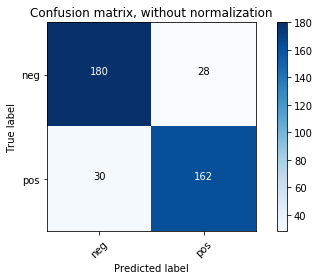

In [63]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=movie_data.target_names, 
                      title='Confusion matrix, without normalization')



Normalized confusion matrix
[[0.86538462 0.13461538]
 [0.15625    0.84375   ]]


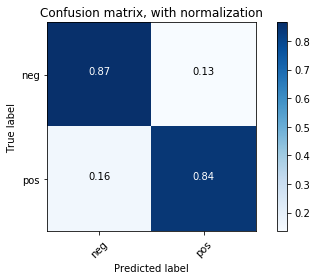

In [62]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=movie_data.target_names,normalize=True,
                      title='Confusion matrix, with normalization')

**Traning the ExtraTreesClassifier

In [53]:
''' classifier2 =  ExtraTreesClassifier(n_estimators=1000, random_state=0) 
classifier2.fit(X_train, y_train)''' 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**function for calling a pre-trained ExtraTreesClassifier model as a pickle 

In [56]:
with open('text_classifierEt', 'rb') as training_model:  
    model1 = pickle.load(training_model)

**Evaluating the model

In [65]:
y_pred2 = model1.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2))  
print(accuracy_score(y_test, y_pred2))  

[[177  31]
 [ 21 171]]
             precision    recall  f1-score   support

          0       0.89      0.85      0.87       208
          1       0.85      0.89      0.87       192

avg / total       0.87      0.87      0.87       400

0.87


**Graphical Representation of Confusion Matrix ExtraTreesClassifier

Confusion matrix, without normalization
[[177  31]
 [ 21 171]]


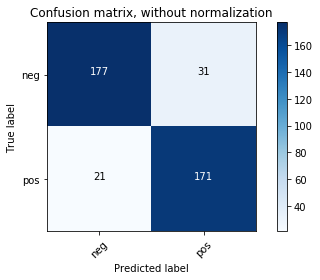

In [67]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), classes=movie_data.target_names, 
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.85096154 0.14903846]
 [0.109375   0.890625  ]]


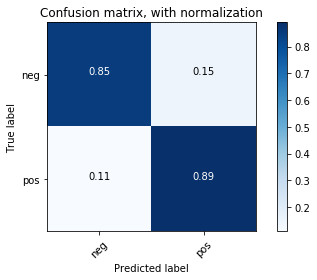

In [68]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), classes=movie_data.target_names,normalize=True,
                      title='Confusion matrix, with normalization')

**Traning the ExtraTreesClassifier

In [70]:
'''classifier3 = AdaBoostClassifier(n_estimators=1000, random_state=0)  
classifier3.fit(X_train, y_train) '''

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=0)

**Saving the trained model as pickle file

In [71]:
'''with open('text_classifierAda', 'wb') as picklefile:  
    pickle.dump(classifier3,picklefile)'''

**function for calling a pre-trained AdaBoostClassifier model as a pickle 

In [72]:
with open('text_classifierAda', 'rb') as training_model:  
    model2 = pickle.load(training_model)

In [73]:
y_pred3 = model2.predict(X_test)

In [74]:
print(confusion_matrix(y_test,y_pred3))  
print(classification_report(y_test,y_pred3))  
print(accuracy_score(y_test, y_pred3))  

[[169  39]
 [ 26 166]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       208
          1       0.81      0.86      0.84       192

avg / total       0.84      0.84      0.84       400

0.8375


**Graphical Representation of Confusion Matrix AdaBoostClassifier

Confusion matrix, without normalization
[[169  39]
 [ 26 166]]


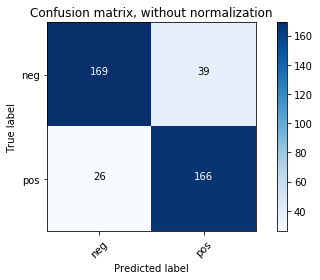

In [75]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred3), classes=movie_data.target_names, 
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.8125     0.1875    ]
 [0.13541667 0.86458333]]


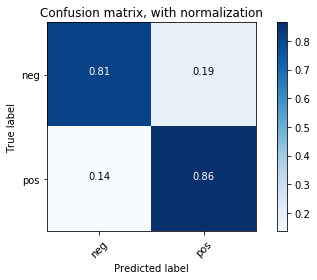

In [76]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred3), classes=movie_data.target_names,normalize=True,
                      title='Confusion matrix, with normalization')